In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import stats 
from scipy.stats import shapiro

In [9]:
class cal_stats:
    def __init__(self, user_data):
        self.data=user_data
    def total(self):
        print('Total Sum:',sum(self.data))
    def count(self):
        print('Total Count:',len(self.data))
    def minimum(self):
        print('Minimum Value:', min(self.data))
    def maximum(self):
        print('Maximum Value:', max(self.data))
    def data_range(self):
        print('Range:', max(self.data)-min(self.data))
    def average(self):
        print('Mean:',np.mean(self.data))
    def median(self):
        print('Median:',np.median(self.data))
    def mode(self):
        try:
            print('Mode:',stats.mode(self.data))
        except:
            print('No Mode')
    def var(self):
        print('Variance:',np.var(self.data))
    def std_dev(self):
        print('Standard Deviation:', np.std(self.data))
    def skew(self):
        print('Skewness:',stats.skewness(self.data))
    def kurt(self):
        print('Kurtosis:',stats.kurtosis(self.data))
    def q1(self):
        self.quartile1=np.percentile(self.data,25)
        print('Q1:', self.quartile1)
    def q3(self):
        self.quartile3=np.percentile(self.data,75)
        print('Q3:', self.quartile3)
    def iqr(self):
        self.iq_range= self.quartile3-self.quartile1
        print('IQR:',self.iq_range)
    def lw(self):
        self.lower=self.quartile1- self.iq_range*1.5
        print('Lower Whisker:',self.lower)
    def uw(self):
        self.upper=self.quartile3+ self.iq_range*1.5
        print('Upper Whisker:',self.upper)
    def outliers_count(self):
        outliers= len([i for i in self.data if i>self.upper or i <self.lower] )
        print('Total Outliers Count:',outliers)
    
    def empirical_rule(self):
        vary=np.var(self.data,ddof=1)
        print('Variance:',vary)
        std_dev= vary**0.5
        print('Standard Deviation:',std_dev)
        for i in range(1,4):
            lower=np.mean(self.data)-i*std_dev
            upper=np.mean(self.data)+i*std_dev
            perc=((self.data>=lower) & (self.data<=upper)).sum() / len(self.data)
            print(f'{i} Standard Deviation Range: ({lower:.2f} to {upper:.2f}) --> {perc*100:.2f}% of data ')
    
    def normality_test(self):
        #If pvalue is low let H0 go
        #If pvalue is high let H0 fly
        stat_val,p_value=shapiro(self.data)
        if p_value>=0.05:
            print('Likely Follows Normal Distribution')
        else:
            print('Likely Does Not Follow Normal Distribution')
    def confidence_interval(self):
        standard_error=np.std(self.data)/np.sqrt(len(self.data))
        for conf, z in [(95,1.96),(97,2.17),(99,2.576)]:
            moe=standard_error*z
            lower=np.mean(self.data)-moe
            upper=np.mean(self.data)+moe
            print(f'{conf}% Confidence Interval: {lower:.2f}, {upper:.2f}')
    def visualize(self):
        #unique values countable = discrete
        #unique values not countable= continuous
        if len(set(self.data))<7:
            print('Detected Discrete Data')
            plt.figure(figsize=(6,6))
            sns.countplot(self.data)
            plt.show()

            plt.figure(figsize=(6,6))
            data_count=pd.Series(self.data).value_counts()
            plt.pie(data_count,labels=data_count.index, autopct="%0.2f%%")
            plt.show()
        else:
            print('Detected Continuous Data')
            plt.figure(figsize=(6,6))
            sns.displot(self.data)
            plt.show()
            plt.figure(figsize=(6,6))
            sns.boxplot(self.data)
            plt.show()
            
                    
        
    def everything(self):
        self.total()
        self.count()
        self.maximum()
        self.minimum()
        self.data_range()
        self.average()
        self.median()
        self.mode()
        self.var()
        self.std_dev()
        self.skew()
        self.kurt()
        self.q1()
        self.q3()
        self.iqr()
        self.lw()
        self.uw()
        self.outliers_count()
        self.empirical_rule()
        self.confidence_interval()
        self.normality_test()
        self.visualize()


Total Sum: 355
Total Count: 15
Maximum Value: 100
Minimum Value: 2
Range: 98
Mean: 23.666666666666668
Median: 16.0
No Mode
Variance: 584.2222222222222
Standard Deviation: 24.170689320377733
Skewness: 1.8508670946697108
Kurtosis: 2.9720880518340973
Q1: 9.0
Q3: 27.5
IQR: 18.5
Lower Whisker: -18.75
Upper Whisker: 55.25
Total Outliers Count: 1
Variance: 625.9523809523808
Standard Deviation: 25.01904036833509
1 Standard Deviation Range: (-1.35 to 48.69) --> 86.67% of data 
2 Standard Deviation Range: (-26.37 to 73.70) --> 93.33% of data 
3 Standard Deviation Range: (-51.39 to 98.72) --> 93.33% of data 
95% Confidence Interval: 11.43, 35.90
97% Confidence Interval: 10.12, 37.21
99% Confidence Interval: 7.59, 39.74
Likely Does Not Follow Normal Distribution
Detected Continuous Data


<Figure size 600x600 with 0 Axes>

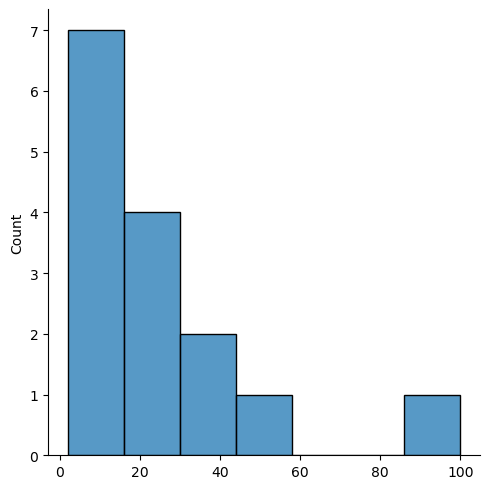

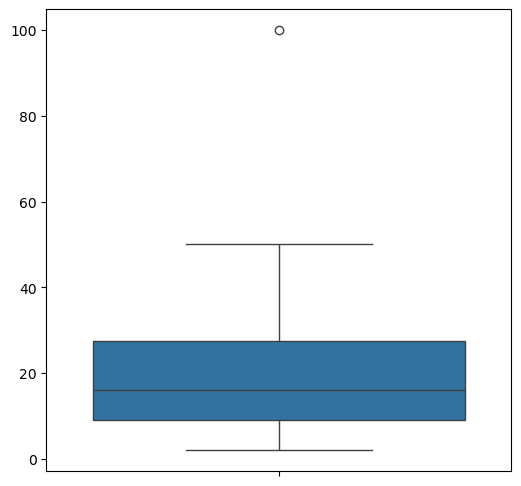

In [11]:
sample=[2,4,6,8,10,12,14,16,18,20,25,30,40,50,100]
obj=cal_stats(sample)
obj.everything()